
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>

In [ ]:

<div class="alert alert-block alert-success"> 
<b>COMENTARIO GENERAL #1</b> <a class="tocSkip"></a>

Felicidades A! Tu trabajo es excelente. 

Has completado todos los items necesarios para aprobar la entrega. Sigue así!

</div>

In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df_games = pd.read_csv('/datasets/games.csv')

In [3]:
df_games['Name']= df_games['Name'].str.strip()
print(df_games.sample(20))

                                                    Name Platform  \
13689                                       Ride to Hell      PS3   
15861                                   My Ballet Studio       DS   
10759                                  Shining Force EXA      PS2   
2664                             Maximo: Ghosts to Glory      PS2   
15676  Metal Fight Beyblade Portable: Chouzetsu Tense...      PSP   
153                                             Tekken 2       PS   
10593                        You Don't Know Jack: Mock 2       PS   
14145                           Zenkoku Dekotora Matsuri      Wii   
12691           CMT Presents: Karaoke Revolution Country      PS2   
8809                             Ice Age 2: The Meltdown       DS   
4795                                     Fighting Vipers      SAT   
14817                         Kiniro no Corda 2 f Encore      PSP   
2153                                        ESPN NBA 2K5       XB   
3387                           Med

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Se ha realizado el ajuste en el nombre de las columnas de forma correcta. 

</div>

In [4]:
col_names_lowered = [] # Bucle en los encabezados poniendo todo en minúsculas
for col in df_games.columns:
    clean_col = col.lower()
    col_names_lowered.append(clean_col)

df_games.columns=col_names_lowered
count = 0

for console in df_games['platform'].unique():
    temp_console = df_games[df_games['platform'] == console]
    avg_console_year = np.floor(temp_console['year_of_release'].mean())
    avg_critic_score = round(temp_console['critic_score'].mean(), ndigits = 1)
    temp_console['year_of_release']= temp_console['year_of_release'].fillna(avg_console_year).astype(int)
    temp_console['name'] = temp_console['name'].fillna('unknown')
    temp_console['genre'] = temp_console['genre'].fillna('unknown')
    temp_console['critic_score'] = temp_console['critic_score'].fillna(avg_critic_score)
    temp_console['rating'] = temp_console['rating'].fillna('unknown')
    
    temp_console['user_score'] = temp_console['user_score'].replace('tbd', np.NaN)
    avg_user_score = round(temp_console['user_score'].astype(float).mean(), ndigits = 1)
    temp_console['user_score'] = temp_console['user_score'].fillna(avg_user_score).astype(float)
    
    if count > 0:
        concatenado = pd.concat([temp_console,temp_console2])
        temp_console2 = concatenado
    else:
        temp_console2 = temp_console
    count = 1

#print(df_games['year_of_release'])
print(concatenado.info())
print(concatenado.sort_values(by = 'genre'))
    

/tmp/ipykernel_49/2467562244.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_console['year_of_release']= temp_console['year_of_release'].fillna(avg_console_year).astype(int)
/tmp/ipykernel_49/2467562244.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_console['name'] = temp_console['name'].fillna('unknown')
/tmp/ipykernel_49/2467562244.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 14634 to 16686
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     15595 non-null  float64
 9   user_score       15595 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None
                                                name platform  \
411    The Lord of the Rings: The Return of the King      PS2   
2028                   The Lost World: Jurassic Park       PS   
1989                       

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Cuidado! Reemplazar todos los faltantes con un único valor no siempre es correcto. En caso de hacerlo, hay que tener cuidado con el valor que se utiliza. 
    
Lo importante es que esté siempre bien justificado. Por qué crees que tal reemplazo es apropiado?

Soluciones válidas en este caso para manejar los nulos serían:

- Introducir un valor irreal que depende de la columna y su significado (-1, -999999, etc.).
- Dejar los huecos sin cambios.

Los valores de Year_of_release se pueden cambiar a cero o eliminarse. Por su parte, no hay mucho que se puede hacer con los valores nulos de critic_score y user_score, los cuales se pueden dejar a null.

Finalmente, considera que este enfoque puede ser costoso en tiempo si el dataset es grande.
</div>

'En el código anterior, se cambiaron los nombres de las columnas a letras minúsculas por medio de las funciones de .columns y .lower. A su vez, como medida de precaución, se utilizó la función .strip para quitar los espacios en blanco de los nombres de los videojuegos. En el bucle del for para tener una base de datos más enriquecida y con coherencia o lógica, se tomaron los promedios de los años en los que cada consola tuvo sus videojuegos y ese promedio se les asignó a los videojuegos que no tenía fecha de lanzamiento, ya que por lógica esos juegos de esa plataforma debería de haber sido lanzados en el mismo lapso de tiempo que todos los demás videojuegos de la misma consola. El año de lanzamiento se convirtió a un valor entero. 

En el caso de los valores ausentes, se trató de igual manera sacar un promedio de las calificaciones de los videojuegos de cada consola para asignárselos a los que no tienen calificaciones tanto de los cíticos como de los usuarios. Para los valores tbd, se convirtieron a un valor NaN primeramente y posteriormente a un valor flotante para así poder sacar el promedio de las calificaciones de los videojuegos por consola. Hubo ocasiones en los que hay un promedio nulo, ya que en todo el ciclo de esa consola, ningún videojuego recibió ninguna calificación.

Se puede observar que en la mayoría de los casos, hay valores ausentes en las calificaciones de los videojuegos y se observa un patrón de que se puede deber a que antes de los años 2000 no se realizaba la práctica de asignar calificaciones a los videojuegos, ya que de ese año en adelante, muchos videojuegos ya empiezan a tener calificaciones y clasificaciones.'

In [5]:
#df_games['year_of_release'] = df_games['year_of_release'].astype(int)
concatenado['total_sales'] = concatenado['na_sales'] + concatenado['eu_sales'] + concatenado['jp_sales'] + concatenado['other_sales']
print(concatenado.sample(15))

                                                    name platform  \
11317                             Konami Classics Vol. 1     X360   
12354                                   OK! Puzzle Stars       DS   
3810                                         NASCAR 2000      N64   
3479                        Naruto: Uzumaki Chronicles 2      PS2   
1764                                             Kaboom!     2600   
12638                                        Theresia...       DS   
3380    Dai-3-Ji Super Robot Taisen α: Shuuen no Ginga e      PS2   
1714                                        Just Dance 4     X360   
11786                            Buster Bros. Collection       PS   
12457                             Giants: Citizen Kabuto      PS2   
11495                            Sniper: Ghost Warrior 2       PC   
7952                                        Blood Omen 2       XB   
13302                                2002 FIFA World Cup       GC   
3583                              

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen trabajo calculando las ventas totales.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Otra forma de hacerlo es de la siguiente manera:

	data['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

</div>

</div>

In [6]:
games_per_year = concatenado['year_of_release'].value_counts()
print(games_per_year)

print(concatenado[concatenado['year_of_release'] == 2008].sample(20))

2008    1524
2009    1456
2010    1280
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     821
2004     796
2012     653
2015     606
2014     582
2013     552
2016     502
2001     482
1998     389
2000     350
1999     338
1997     289
1996     263
1995     220
1994     121
1993      62
1982      53
1981      46
1992      43
1991      41
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64
                                                    name platform  \
9775                                        Ninja Reflex      Wii   
7753                          Dynasty Warriors: Gundam 2     X360   
15953                  PDC World Championship Darts 2008       DS   
12588           Little League World Series Baseball 2008       DS   
2415                                        Beijing 2008      PS3   
5146                 Medieval II: Total War Gold Edition       PC   


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen análisis sobre el lanzamiento de los videojuegos. Además, el gráfico utilizado es excelente y las conclusiones se presentan claramente.

</div>

'No es de extrañarse que en el año 2008 se hayan vendido tantos juegos, ya que estaban en su tiempo de vida las consolas más vendidas de todos los tiempos, como lo fue el Wii, el PS2 y el Nintendo DS. Hay que sumarle también que había más consolas en circulación, lo que propiciaba el aumento de juegos lanzados este año.'

In [7]:
#pivot_data = concatenado.pivot_table(index='platform',
#                            columns='year_of_release',
#                            values='total_sales',
#                            aggfunc='sum'
#                           )
#print(pivot_data)

groupby_data = concatenado.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
print(groupby_data)

pivot_data = groupby_data.pivot_table(index='year_of_release',
                            columns='platform',
                            values='total_sales'
                           ).reset_index()
print(pivot_data)

    platform  year_of_release  total_sales
0       2600             1980        11.38
1       2600             1981        35.68
2       2600             1982        39.38
3       2600             1983         5.84
4       2600             1984         0.27
..       ...              ...          ...
233       XB             2008         0.18
234     XOne             2013        18.96
235     XOne             2014        54.07
236     XOne             2015        60.14
237     XOne             2016        26.15

[238 rows x 3 columns]
platform  year_of_release   2600   3DO    3DS    DC      DS     GB    GBA  \
0                    1980  11.38   NaN    NaN   NaN     NaN    NaN    NaN   
1                    1981  35.68   NaN    NaN   NaN     NaN    NaN    NaN   
2                    1982  39.38   NaN    NaN   NaN     NaN    NaN    NaN   
3                    1983   5.84   NaN    NaN   NaN     NaN    NaN    NaN   
4                    1984   0.27   NaN    NaN   NaN     NaN    NaN    NaN  

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El agrupamiento y pivotaje están bien hechos, pero mostrar tablas con print() limita el análisis visual. Te recomiendo usar gráficos para comparar fácilmente la evolución de ventas por plataforma a lo largo del tiempo. Esto facilita la interpretación y comunica mejor los hallazgos.

</div>

In [8]:
top_sales_console = []

for new_console in groupby_data['platform'].unique():
    temporal_console = groupby_data[groupby_data['platform'] == new_console]
    total_sales_per_console = round(temporal_console['total_sales'].sum(), ndigits = 2)
    top_sales_console.append([new_console, total_sales_per_console])

all_time_sales = pd.DataFrame(data=top_sales_console, columns=['platform', 'sales_history'])
print(all_time_sales.sort_values(by = 'sales_history', ascending = False))

    

   platform  sales_history
16      PS2        1255.77
28     X360         971.42
17      PS3         939.65
26      Wii         907.51
4        DS         806.12
15       PS         730.86
6       GBA         317.85
18      PS4         314.14
19      PSP         294.05
13       PC         259.52
2       3DS         259.00
29       XB         257.74
5        GB         255.46
11      NES         251.05
10      N64         218.68
23     SNES         200.04
7        GC         198.93
30     XOne         159.32
0      2600          96.98
27     WiiU          82.19
20      PSV          54.07
21      SAT          33.59
8       GEN          30.77
3        DC          15.95
22      SCD           1.86
12       NG           1.44
25       WS           1.42
24     TG16           0.16
1       3DO           0.10
9        GG           0.04
14     PCFX           0.03


'Se elegirán las 5 consolas que más juegos han vendido hasta el año 2016. En este caso, será el PS2, X360, PS3, Wii y DS para graficar la distribución de juegos por año. Para este ejercicio se utilizó la fucnión groupby, ya que es más intuitivo y no tiene tantos datos inservibles a la vista si se utilizara la tabla dinámica.'

In [9]:
only_top_consoles = pivot_data[['year_of_release', 'PS2', 'X360', 'PS3', 'Wii', 'DS']].drop(pivot_data.index[0:19])
print(only_top_consoles)

platform  year_of_release     PS2    X360     PS3     Wii      DS
19                   1999     NaN     NaN     NaN     NaN     NaN
20                   2000   39.17     NaN     NaN     NaN     NaN
21                   2001  166.43     NaN     NaN     NaN     NaN
22                   2002  205.38     NaN     NaN     NaN     NaN
23                   2003  184.31     NaN     NaN     NaN     NaN
24                   2004  234.02     NaN     NaN     NaN   17.27
25                   2005  160.66    8.25     NaN     NaN  130.14
26                   2006  103.42   51.62   20.96  137.15  119.81
27                   2007   75.99   95.41   73.19  152.77  146.94
28                   2008   53.90  135.26  118.52  187.65  148.65
29                   2009   26.40  130.47  130.93  206.97  119.54
30                   2010    5.64  170.03  150.48  127.95   85.02
31                   2011    0.45  143.84  156.78   59.65   26.18
32                   2012     NaN   99.74  107.36   21.71   11.01
33        

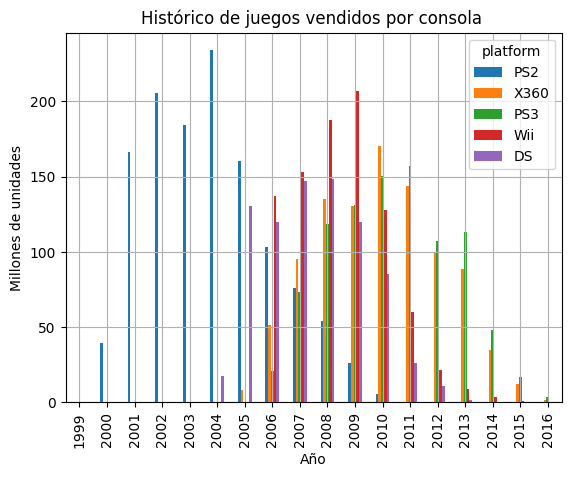

In [10]:
only_top_consoles.plot(x='year_of_release', y=['PS2', 'X360', 'PS3', 'Wii', 'DS'], kind='bar', title = 'Histórico de juegos vendidos por consola ', xlabel='Año', ylabel='Millones de unidades', grid=True)
plt.show()

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El gráfico es adecuado para mostrar la evolución de ventas de las principales consolas, pero al usar kind='bar', los años se solapan si hay muchos valores. Para series temporales, un line plot (kind='line') suele ser más claro y fácil de leer. También puedes rotar las etiquetas del eje x si mantienes el gráfico de barras.

</div>

'De acuerdo a la gráfica, el PS2 fue de los sistemas más longevos en seguir en el mercado, teniendo alrededor de 10 años de ventas significativas en videojuegos, así como el X360. Generalmente, conforme pasa el tiempo, las consolas de la nueva generación tardan más en salir al mercado que sus generaciones anteriores, siendo las actuales tardando en salir aproximadamente entre 6 a 8 años.  '

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Realizas un análisis correcto del ciclo de vida de las consolas. 

</div>

In [11]:
only_modern_console = pivot_data[pivot_data['year_of_release'] > 2005]
col_modern = only_modern_console.dropna(axis = 1, how = 'all')
print(col_modern)

platform  year_of_release    3DS    DC      DS   GBA     GC     PC     PS2  \
26                   2006    NaN   NaN  119.81  5.28  11.26   2.85  103.42   
27                   2007    NaN  0.02  146.94  3.40   0.27   9.28   75.99   
28                   2008    NaN  0.04  148.65   NaN    NaN  16.18   53.90   
29                   2009    NaN   NaN  119.54   NaN    NaN  16.91   26.40   
30                   2010    NaN   NaN   85.02   NaN    NaN  24.28    5.64   
31                   2011  63.20   NaN   26.18   NaN    NaN  35.03    0.45   
32                   2012  51.36   NaN   11.01   NaN    NaN  23.22     NaN   
33                   2013  57.76   NaN    1.54   NaN    NaN  12.38     NaN   
34                   2014  43.76   NaN     NaN   NaN    NaN  13.28     NaN   
35                   2015  27.78   NaN     NaN   NaN    NaN   8.52     NaN   
36                   2016  15.14   NaN     NaN   NaN    NaN   5.25     NaN   

platform     PS3     PS4    PSP    PSV     Wii   WiiU    X360  

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El filtrado por año y eliminación de columnas vacías es correcto. Sin embargo, en lugar de imprimir la tabla, podrías visualizar las ventas de consolas modernas con un gráfico de líneas Así se aprecia mejor la tendencia y comparación entre plataformas recientes.

</div>

'En este Dataframe, se eliminaron las ventas de los videojuegos de antes del año 2006, ya que son datos irrelevantes para darse una idea de cómo se comportará el mercado después del 2016, así como también se eliminaron las consolas que ya no tienen ni una sola venta después del año 2006. Las plataformas líderes en ventas y potencialmente rentables para el próximo año sería el PS4 y el XOne, ya que van a la mitad de su ciclo de vida promedio. '

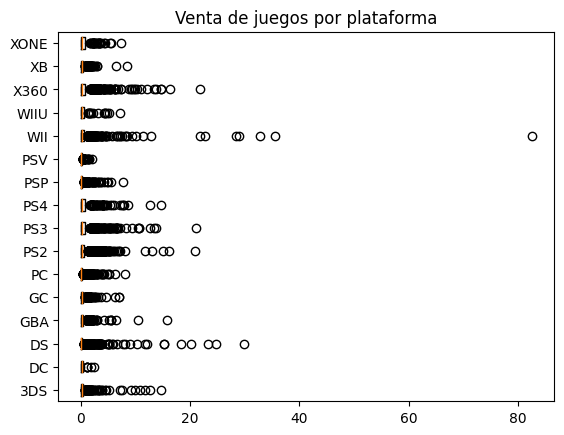

         name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  \
0  Wii Sports      Wii             2006  Sports     41.36     28.96      3.77   

   other_sales  critic_score  user_score rating  total_sales  
0         8.45          76.0         8.0      E        82.54  


In [12]:
only_3DS = concatenado[concatenado['platform'] == '3DS']
only_DC = concatenado[concatenado['platform'] == 'DC']
only_DS = concatenado[concatenado['platform'] == 'DS']
only_GBA = concatenado[concatenado['platform'] == 'GBA']
only_GC = concatenado[concatenado['platform'] == 'GC']
only_PC = concatenado[concatenado['platform'] == 'PC']
only_PS2 = concatenado[concatenado['platform'] == 'PS2']
only_PS3 = concatenado[concatenado['platform'] == 'PS3']
only_PS4 = concatenado[concatenado['platform'] == 'PS4']
only_PSP = concatenado[concatenado['platform'] == 'PSP']
only_PSV = concatenado[concatenado['platform'] == 'PSV']
only_WII = concatenado[concatenado['platform'] == 'Wii']
only_WIIU = concatenado[concatenado['platform'] == 'WiiU']
only_X360 = concatenado[concatenado['platform'] == 'X360']
only_XB = concatenado[concatenado['platform'] == 'XB']
only_XONE = concatenado[concatenado['platform'] == 'XOne']

plt.boxplot([only_3DS['total_sales'], only_DC['total_sales'], only_DS['total_sales'], only_GBA['total_sales'], only_GC['total_sales'], only_PC['total_sales'], only_PS2['total_sales'], only_PS3['total_sales'], only_PS4['total_sales'], only_PSP['total_sales'], only_PSV['total_sales'], only_WII['total_sales'], only_WIIU['total_sales'], only_X360['total_sales'], only_XB['total_sales'], only_XONE['total_sales']], vert = False, labels = ['3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'WII', 'WIIU', 'X360', 'XB', 'XONE' ])
plt.title('Venta de juegos por plataforma')
plt.show()



print(concatenado[concatenado['total_sales'] > 80])











<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El boxplot horizontal está muy bien para comparar distribuciones de ventas entre consolas; buena elección.

</div>

Aquí lo mejor es no mostrar los outliers para poder ver más claramente las cajas y poder realizar comparativas.

</div>

'La gráfica de  cajas nos muestra que hay un valor atípico en la consola Wii, ya que hay un juego que vendió muchas copias, arriba de 80 millones. A pesar de esto, no es la consola que más juegos ha vendido, este sería para la PS2, ya que concentra muchos valores atípicos, lo que en su conjunto logra que haya vendido más juegos que las demás consolas. '

0.11296997631831295
0.1742301709335569


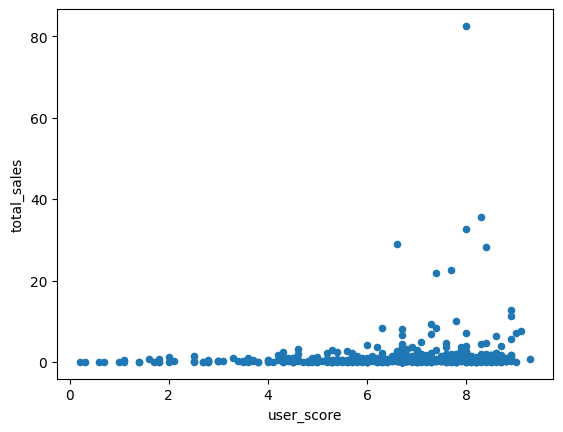

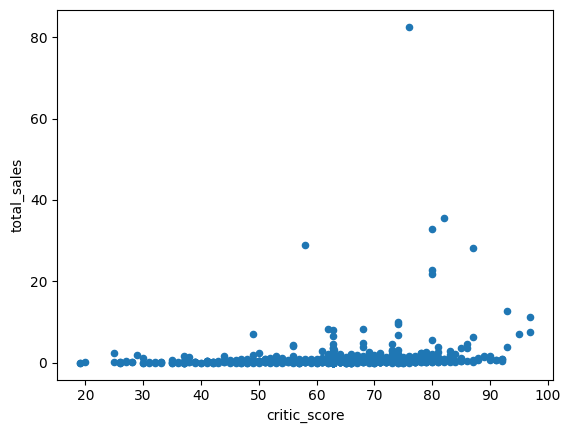

In [13]:
wii_corr_user = only_WII['total_sales'].corr(concatenado['user_score'])
wii_corr_critic = only_WII['total_sales'].corr(concatenado['critic_score'])

print(wii_corr_user)
print(wii_corr_critic)

only_WII.plot(x='user_score', y='total_sales', kind='scatter')
only_WII.plot(x='critic_score', y='total_sales', kind='scatter')


plt.show()

'Para este ejercicio, se tomó en cuenta la consola WII para comparar si las reseñas tanto de críticos como de usuarios influyen en las ventas totales de los videojuegos, ya que tiene datos útiles porque ya tiene una sucesora de consola en el mismo dataframe lo que nos permite calcular mejor las ventas y reseñas porque ya se cumplió su ciclo de vida. En este caso, podemos observar que las reseñas tanto de críticos como de usuarios no impactaron de gran medida en las ventas totales de los videojuegos. Sí influye un poco en las ventas, ya que la correlación es positiva por arriba de .11 en ambos casos. La gráfica puede ser engañosa ya que hay un juego que vendió muy por encima que los demás, arriba de 80 millones, lo que no deja apreciar bien el patrón de que sí influyen mínimamnete las reseñas en las ventas totales.   '


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El cálculo de correlaciones está bien, pero hay un error lógico: comparas only_WII['total_sales'] con concatenado['user_score'], que incluye otras plataformas. Deberías usar only_WII['user_score'] para mantener la coherencia en ambas variables. Las gráficas de dispersión son adecuadas para visualizar estas relaciones, así que bien hecho en ese aspecto.

Realmente deberías ver que hay una correlación positiva para las reseñas de los críticos y que no sucede lo mismo con el puntaje de los usuarios.  Es decir, debes ver que un puntaje más alto de los críticos generalmente trae más ingresos.

</div>

                                                   name platform_x  \
699       LEGO Indiana Jones 2: The Adventure Continues       X360   
161                               Brunswick Pro Bowling        3DS   
362                         DreamWorks Super Star Kartz        PS3   
1410            The Legend of Spyro: Dawn of the Dragon       X360   
1263                              Skylanders: Trap Team        3DS   
585                      Ice Age: Dawn of the Dinosaurs         PC   
819                                 Margot's Word Brain         DS   
1630                                  Wipeout: The Game         DS   
272                                 Crash of the Titans       X360   
1134                         Reader Rabbit Kindergarten         DS   
333                                     Disney Universe        PS3   
1123                                        Ratatouille       X360   
1165                        Rock Band: Metal Track Pack        PS3   
495                 

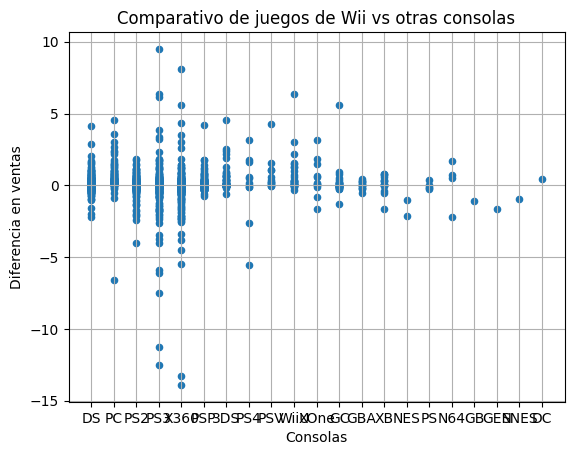

In [14]:
not_wii = concatenado[concatenado['platform'] != 'Wii']
cleaned_not_wii = not_wii[['name', 'platform', 'total_sales']]
cleaned_wii = only_WII[['name', 'platform', 'total_sales']]
merged_wii_sales = cleaned_not_wii.merge(cleaned_wii, on = 'name')
merged_wii_sales['wii_vs_other_sales'] = merged_wii_sales['total_sales_y']-merged_wii_sales['total_sales_x']

#pivot_wii = merged_wii_sales.pivot_table(index='name',
#                            columns='platform_x',
#                            values='wii_vs_other_sales'
#                           )

grouped_wii_vs_other = merged_wii_sales.groupby(['name', 'platform_x'])['wii_vs_other_sales'].mean().reset_index()
grouped_wii_vs_other.plot(x='platform_x', y='wii_vs_other_sales', kind='scatter', title = 'Comparativo de juegos de Wii vs otras consolas', xlabel='Consolas', ylabel='Diferencia en ventas', grid=True)

#print(merged_wii_sales[merged_wii_sales['platform_x'] == 'N64'])
print(grouped_wii_vs_other.sample(40))
plt.show()

'Por medio de la gráfica y de la tabla, vemos que las diferencias de las ventas de videojuegos de los mismos títulos de Wii son equilibradas. En ciertos títulos el Wii vende más que las otras consolas y viceversa. Esto puede deberse a que los títulos que más vendió Wii era porque estaban a mitad de su ciclo de vida o a inicios, cuando la consola era la novedad. Por otro lado, se puede intuir que las consolas que iban saliendo cuando el Wii estaba cerca del fin de su ciclo de vida, vendían más juegos, debido a que los usuarios querían invertir en juegos más actualizados en consolas más recientes. '

           genre  avg_sales
12       unknown   1.210000
4       Platform   0.932173
8        Shooter   0.795503
7   Role-Playing   0.623872
6         Racing   0.583403
10        Sports   0.566980
2       Fighting   0.527126
0         Action   0.517711
3           Misc   0.458577
9     Simulation   0.446701
5         Puzzle   0.418224
11      Strategy   0.255095
1      Adventure   0.182341


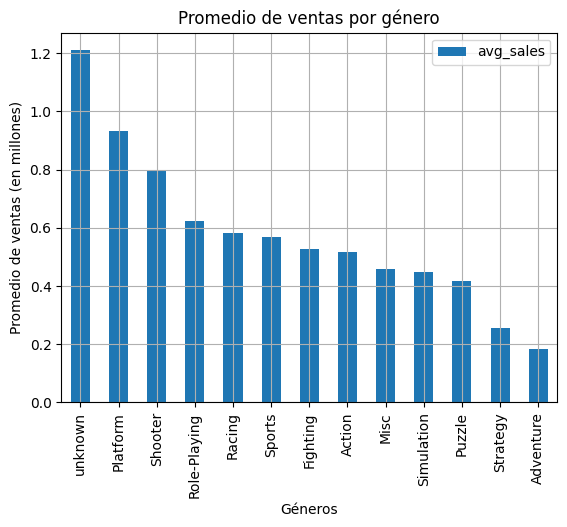

In [15]:
clean_by_genre = concatenado[['name', 'platform', 'genre', 'total_sales']]
grouped_genre = clean_by_genre.groupby('genre').mean().reset_index().rename(columns = {'total_sales' :'avg_sales'}).sort_values(by = 'avg_sales', ascending = False)

print(grouped_genre)

grouped_genre.plot(x='genre', y='avg_sales', kind='bar', title = 'Promedio de ventas por género', xlabel='Géneros', ylabel='Promedio de ventas (en millones)', grid=True)
plt.show()

#mean_genre = []
#for genre in clean_by_genre['genre'].unique():
#    temp_genre = clean_by_genre[clean_by_genre['genre'] == genre]
#    sales_by_genre = round(temp_genre['total_sales'].mean(), ndigits = 2)
#    mean_genre.append([genre, sales_by_genre])
#    print(mean_genre)

'Para conocer qué géneros son los más rentables, se realizó un promedio de ventas de los juegos por géneros, ya que si sólo sumábamos las ventas, no se tendría un panorama correcto, ya que pueden sacar muchos juegos de un mismo género y no vender muy bien, y aún así tener más ventas totales que los otros géneros. En este caso, se  encontraron dos juegos que no tienen nombre ni género, por lo que los vamos a descartar para este análisis y podemos observar que los géneros más rentables son los de plataformas, shooter y role-playing hasta el 2016. No podemos generalizar que todos los juegos de dicho género venden menos que los otros, ya que puede haber juegos de Aventura que vendan más que los de plataforma.'

   platform  na_sales
28     X360    602.47
16      PS2    583.84
26      Wii    496.90
17      PS3    393.49
4        DS    382.40
   platform  eu_sales
16      PS2    339.29
17      PS3    330.29
28     X360    270.76
26      Wii    262.21
15       PS    213.61
   platform  jp_sales
4        DS    175.57
15       PS    139.82
16      PS2    139.20
23     SNES    116.55
2       3DS    100.67


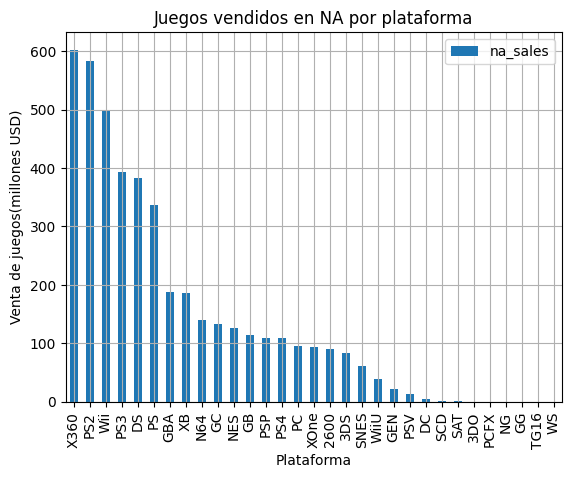

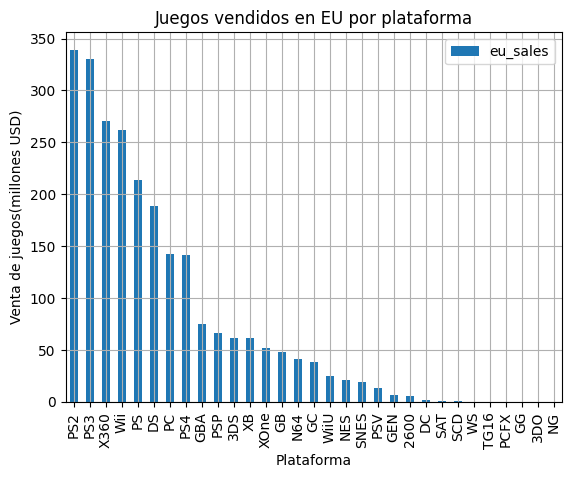

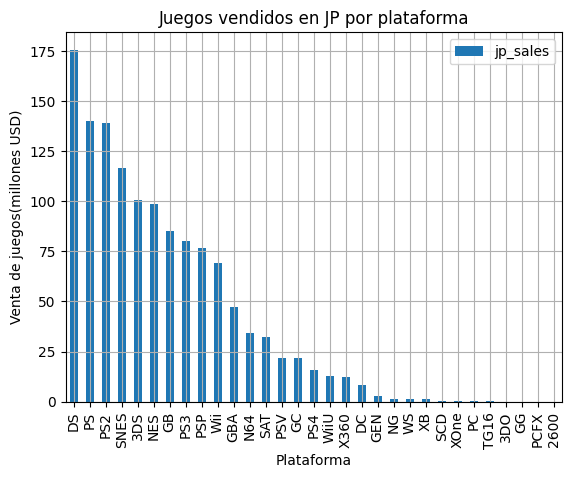

In [37]:
clean_for_region = concatenado[['name', 'platform', 'na_sales', 'eu_sales','jp_sales']]

grouped_region = clean_for_region.groupby('platform').sum().reset_index()
top_platform_na = grouped_region[['platform', 'na_sales']].sort_values(by = 'na_sales', ascending = False)
top_platform_eu = grouped_region[['platform', 'eu_sales']].sort_values(by = 'eu_sales', ascending = False)
top_platform_jp = grouped_region[['platform', 'jp_sales']].sort_values(by = 'jp_sales', ascending = False)

#print(grouped_region)
print(top_platform_na.head())
top_platform_na.plot(x='platform', y='na_sales', kind='bar', title = 'Venta de juegos en NA por plataforma', xlabel='Plataforma', ylabel='Venta de juegos(millones USD)', grid=True)

print(top_platform_eu.head())
top_platform_eu.plot(x='platform', y='eu_sales', kind='bar', title = 'Venta de juegos en EU por plataforma', xlabel='Plataforma', ylabel='Venta de juegos(millones USD)', grid=True)

print(top_platform_jp.head())
top_platform_jp.plot(x='platform', y='jp_sales', kind='bar', title = 'Venta de juegos en JP por plataforma', xlabel='Plataforma', ylabel='Venta de juegos(millones USD)', grid=True)

plt.show()

'Para las regiones NA y EU vemos que las preferencias de las consolas coinciden entre estas regiones, siendo el DS más popular en NA y el PS en EU. En donde vemos un cambio en las preferencias de las consolas es en japón, ya que se encuentran el 3DS y el SNES entre las principales consolas, las cuales no se encontraron en NA y en EU. Algo que hay que notar es que el X360 que es muy popular en las otras regiones, no aparece como una de las primeras consolas en JP, ni siquiera en el top 15, y es normal ya que los japoneses tienen la práctica de comprar productos producidos en su misma región.'

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! Muy buen trabajo Alejandro

</div>

           genre  na_sales  eu_sales  jp_sales
0         Action    879.01    519.13    161.43
1      Adventure    105.26     63.54     52.30
2       Fighting    223.36    100.33     87.48
3           Misc    407.27    212.74    108.11
4       Platform    445.50    200.35    130.83
5         Puzzle    122.87     50.01     57.31
6         Racing    359.35    236.51     56.71
7   Role-Playing    330.81    188.71    355.41
8        Shooter    592.24    317.34     38.76
9     Simulation    181.92    113.52     63.80
10        Sports    684.43    376.79    135.54
11      Strategy     68.55     45.17     49.66
12       unknown      1.78      0.53      0.03
       genre  na_sales
0     Action    879.01
10    Sports    684.43
8    Shooter    592.24
4   Platform    445.50
3       Misc    407.27
      genre  eu_sales
0    Action    519.13
10   Sports    376.79
8   Shooter    317.34
6    Racing    236.51
3      Misc    212.74
           genre  jp_sales
7   Role-Playing    355.41
0         Action  

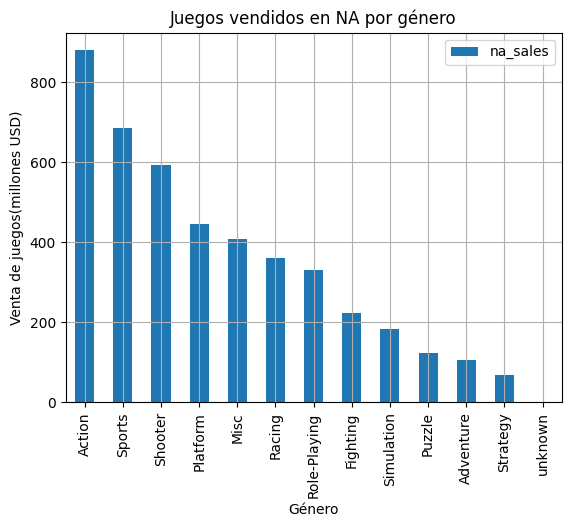

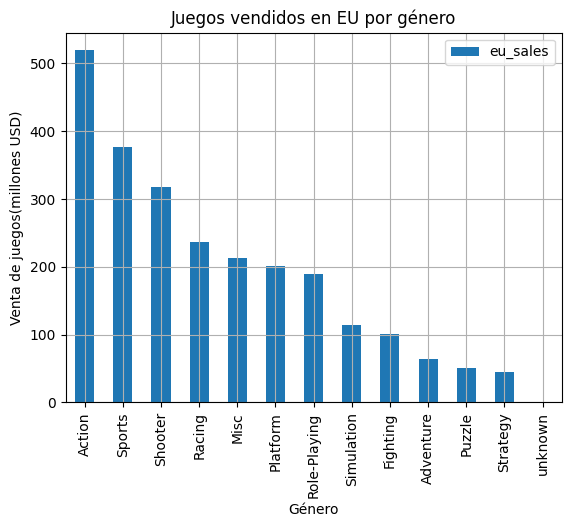

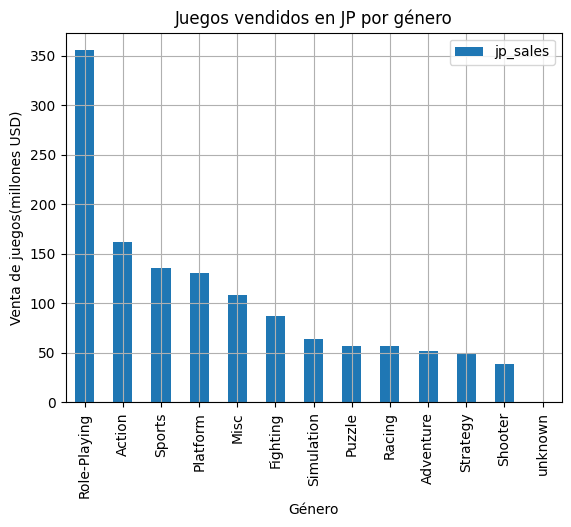

In [39]:
clean_for_top_genres = concatenado[['name', 'genre', 'na_sales', 'eu_sales','jp_sales']]

grouped_top_genre = clean_for_top_genres.groupby('genre').sum().reset_index()
top_genre_na = grouped_top_genre[['genre', 'na_sales']].sort_values(by = 'na_sales', ascending = False)
top_genre_eu = grouped_top_genre[['genre', 'eu_sales']].sort_values(by = 'eu_sales', ascending = False)
top_genre_jp = grouped_top_genre[['genre', 'jp_sales']].sort_values(by = 'jp_sales', ascending = False)

print(grouped_top_genre)
print(top_genre_na.head())
top_genre_na.plot(x='genre', y='na_sales', kind='bar', title = 'Venta de juegos en NA por género', xlabel='Género', ylabel='Venta de juegos(millones USD)', grid=True)

print(top_genre_eu.head())
top_genre_eu.plot(x='genre', y='eu_sales', kind='bar', title = 'Venta de juegos en EU por género', xlabel='Género', ylabel='Venta de juegos(millones USD)', grid=True)

print(top_genre_jp.head())
top_genre_jp.plot(x='genre', y='jp_sales', kind='bar', title = 'Venta de juegos en JP por género', xlabel='Género', ylabel='Venta de juegos(millones USD)', grid=True)


plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Todos los gráficos y conclusiones son correctos. 

</div>

'De igual manera como sucedió con las consolas, las regiones de NA y EU comparten las preferencias de los géneros de videojuegos, a excepción de las paltaformas que son de mayor preferencia en NA, y los de Racing que son de mayor preferencia en EU. En JP los juegos Role-Playing son el género preferido, el cual no se encuentra en el top 5 de las regiones de NA y EU. Action, Sports y Misc son los géneros que están en el top 5 de los gustos de las 3 regiones. '

    rating  na_sales
1        E   1292.99
8  unknown   1242.46
7        T    759.75
5        M    748.48
2     E10+    353.32
4      K-A      2.56
3       EC      1.53
0       AO      1.26
6       RP      0.00
--------------------
    rating  eu_sales
1        E    710.25
8  unknown    613.83
5        M    483.97
7        T    427.03
2     E10+    188.52
0       AO      0.61
4      K-A      0.27
3       EC      0.11
6       RP      0.08
--------------------
    rating  jp_sales
8  unknown    841.96
1        E    198.11
7        T    151.40
5        M     64.24
2     E10+     40.20
4      K-A      1.46
0       AO      0.00
3       EC      0.00
6       RP      0.00


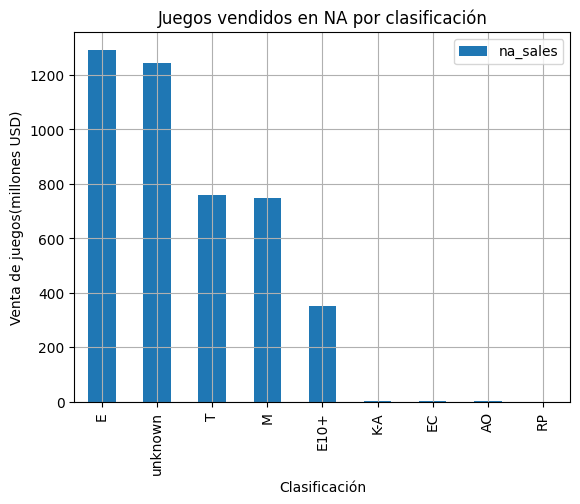

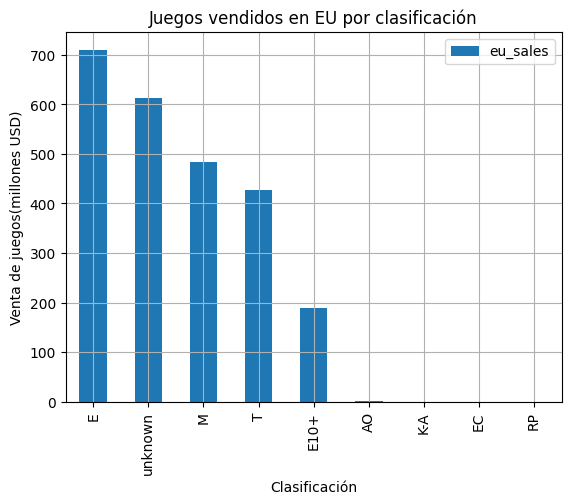

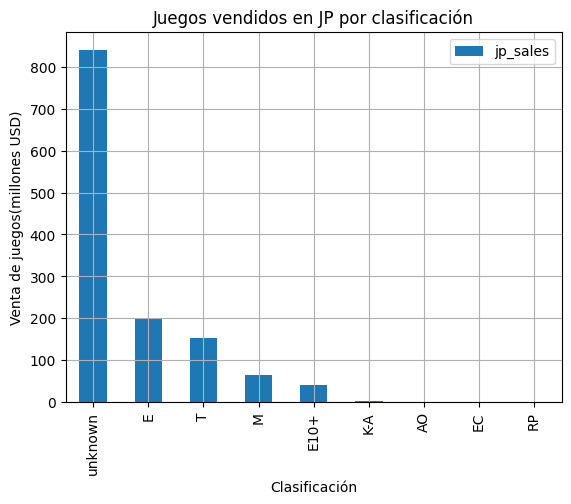

In [47]:
clean_for_rating = concatenado[['name', 'rating', 'na_sales', 'eu_sales','jp_sales']]

grouped_top_rating = clean_for_rating.groupby('rating').sum().reset_index()
top_rating_na = grouped_top_rating[['rating', 'na_sales']].sort_values(by = 'na_sales', ascending = False)
top_rating_eu = grouped_top_rating[['rating', 'eu_sales']].sort_values(by = 'eu_sales', ascending = False)
top_rating_jp = grouped_top_rating[['rating', 'jp_sales']].sort_values(by = 'jp_sales', ascending = False)

#print(grouped_top_rating)
print(top_rating_na)
print('--------------------')
print(top_rating_eu)
print('--------------------')
print(top_rating_jp)

top_rating_na.plot(x='rating', y='na_sales', kind='bar', title = 'Venta de juegos en NA por clasificación', xlabel='Clasificación', ylabel='Venta de juegos(millones USD)', grid=True)
top_rating_eu.plot(x='rating', y='eu_sales', kind='bar', title = 'Venta de juegos en EU por clasificación', xlabel='Clasificación', ylabel='Venta de juegos(millones USD)', grid=True)
top_rating_jp.plot(x='rating', y='jp_sales', kind='bar', title = 'Venta de juegos en JP por clasificación', xlabel='Clasificación', ylabel='Venta de juegos(millones USD)', grid=True)


plt.show()

'Como observamos en las gráficas, las clasificaciones de los videojuegos si repercuten en las ventas, ya que los juegos que más dinero recaudan son los de clasificación E, T y M en las 3 regiones. No se tomará en cuenta la clasificación unknown debido a que no es una clasificación utilizada por la ESRB y puede ser un dato engañoso.  '

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El análisis realizado por cada región está muy bien fundamentado. Además, los resultados se presentan de forma clara y ordenada, lo que facilita la comprensión de la información. Esto permite identificar rápidamente las diferencias y similitudes entre cada región, y contribuye a un mejor entendimiento de los patrones generales. 

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como sugerencia, podrías agregar una visualización comparativa (por ejemplo, un gráfico de barras apiladas o un heatmap) para reforzar visualmente los contrastes entre regiones en géneros o plataformas.

</div>

</div>

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Aquí podrías poner un título para separar secciones. Admeás, recuerda definir claramente las hipótesis a evaluar.

</div>

In [63]:
sample_xone = concatenado[concatenado['platform'] == 'XOne']['user_score']
sample_pc = concatenado[concatenado['platform'] == 'PC']['user_score']
alpha = 0.05

print('Varianza de calificaciones en Xbox One', np.var(sample_xone))
print('Varianza de calificaciones en PC', np.var(sample_pc))

results = st.ttest_ind(sample_xone, sample_pc, equal_var = True)

print('valor p: ', results.pvalue)



if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula. Las calificaciones de los usuarios NO son iguales.")
else:
    print("No podemos rechazar la hipótesis nula. Las calificaciones de los usuarios SÍ son iguales")
    


Varianza de calificaciones en Xbox One 1.3975239718730024
Varianza de calificaciones en PC 1.8483495840518789
valor p:  5.699226816901002e-09
Rechazamos la hipótesis nula. Las calificaciones de los usuarios NO son iguales.


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al realizar una prueba de hipótesis, es muy importante verificar los supuestos. El t-test que usaste funciona bien cuando se cumplen ciertos supuestos, como que las varianzas de ambos grupos sean similares. Puedes realizar la prueba de levene para comprobar que los dos grupos tienen la misma varianza y, de esta forma, podrás saber el valor del parámetro equal_var que se debe utilizar en la función stats.ttest_ind.

</div>

'La hipótesis nula siempre será tomada en cuenta como si fuera una igualdar, por lo que en este caso ésta sería que las calificaciones de los usuarios sí son iguales en ambas plataformas. Para probar la hipótesis de que las calificaciones promedio de los usuarios son las mismas para Xbox One y PC utilizamos la hipótesis sobre la igualdad de las medias de dos poblaciones. A pesar de que la varianza entre el conjunto de calificaciones  de usuarios en PC y Xbox One son muy cercanas, al hacer la prueba con la función st.ttest_ind podemos observar que no se puede asegurar que las calificaciones de los usuarios de ambas plataformas SÍ son iguales.'

In [71]:
sample_action = concatenado[concatenado['genre'] == 'Action']['user_score']
sample_sports = concatenado[concatenado['genre'] == 'Sports']['user_score']
alpha = 0.05

print('Varianza de calificaciones de género Action', np.var(sample_action))
print('Varianza de calificaciones de género Sports', np.var(sample_sports))

results = st.ttest_ind(sample_action.dropna(), sample_sports.dropna(), equal_var = True)#Se incluye la función dropna() para ignorar las celdas que no contienen un valor

print('valor p: ', results.pvalue)

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula. Las calificaciones de los usuarios NO son iguales para los géneros de Acción y Deportes.")
else:
    print("No podemos rechazar la hipótesis nula. Las calificaciones de los usuarios SÍ son iguales para los géneros de Acción y Deportes.")
    

Varianza de calificaciones de género Action 1.225588465837483
Varianza de calificaciones de género Sports 1.4628611419087676
valor p:  0.3039972818903305
No podemos rechazar la hipótesis nula. Las calificaciones de los usuarios SÍ son iguales para los géneros de Acción y Deportes.


'Al igual que la hipótesis anterior, se establece como hipótesis nula que las calificaciones de los usuarios son las mismas para los géneros de Acción y Deportes, y la hipótesis alternativa sería que estos cuentan con calificaciones diferentes. También se usa la función st.ttest_ind para la hipótesis de la media de dos poblaciones, y en este caso podemos tener la certeza de que las calificaciones sí serán iguales o similares para los juegos de Acción y Deportes ya que el p value es mayor que el umbral de alpha.'

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a><p>
Los resultados obtenidos son coherentes con lo esperado. Muy buen trabajo aplicando las pruebas de hipótesis!
</p>
<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a><p>
He notado que hay fragmentos de código repetidos en ambos procesos. Sería recomendable encapsularlos en funciones para mejorar la reutilización y mantener un código más limpio y modular.
</p>
</div>
</div>

## CONCLUSIÓN ##

'Al revisar todos los datos y resultados obtenidos con los ejercicios, se puede crear una predicción en cuanto a qué videojuego o videojuegos serían los idóneos a crear para obtener buenos ingresos. Las mejores opciones para lograrlo sería crear un videojuego clasificación E o T, para las consolas PS4 o Xbox One, ya que están a la mitad de su ciclo de vida, y del género de Acción o Deportes. Se sugiere que solamente sea en esas dos consolas ya que en otras consolas ya se terminó su ciclo de vida y no se obtendrán ventas significativas. 

También otra opción para proyectar buenos ingresos a los creadores de videojuegos es hacer juegos de Plataformas, ya que en promedio son los juegos que mayores ingresos obtienen individualmente, y en las 3 regiones más importantes sí son juegos que están entre los preferidos por los compradores.'

